In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.express as px
print('Success')

Success


In [223]:
data=pd.read_csv('StudentPerformanceFactors.csv')
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [224]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [225]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [227]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [228]:
data.Teacher_Quality.dtype

dtype('O')

In [229]:
data.Teacher_Quality.head()

0    Medium
1    Medium
2    Medium
3    Medium
4      High
Name: Teacher_Quality, dtype: object

In [230]:
data.Teacher_Quality.mode()

0    Medium
Name: Teacher_Quality, dtype: object

In [231]:
data.shape

(6607, 20)

In [232]:
data.Teacher_Quality.isnull().sum()

78

In [234]:
mode_value = data['Teacher_Quality'].mode()[0]
data['Teacher_Quality'].fillna(mode_value, inplace=True)

In [235]:
data.Teacher_Quality.isnull().sum()

0

In [236]:
data.Parental_Education_Level.isnull().sum()

90

In [237]:
data.Parental_Education_Level.dtype

dtype('O')

In [238]:
data.Parental_Education_Level.head()

0     High School
1         College
2    Postgraduate
3     High School
4         College
Name: Parental_Education_Level, dtype: object

In [240]:
pel_mode=data['Parental_Education_Level'].mode()[0] #The [0] in the code data['Parental_Education_Level'].mode()[0] is used to extract the first element from the Series returned by the mode() method.
data['Parental_Education_Level'].fillna(pel_mode, inplace=True)

In [241]:
data.Parental_Education_Level.isnull().sum()

0

In [242]:
data.Distance_from_Home.dtype

dtype('O')

In [243]:
data.Distance_from_Home.head()

0        Near
1    Moderate
2        Near
3    Moderate
4        Near
Name: Distance_from_Home, dtype: object

In [245]:
distance_mode=data['Distance_from_Home'].mode()[0]
data['Distance_from_Home'].fillna(distance_mode, inplace=True)

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [247]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [248]:
columns=[data.columns]
columns

[Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
        'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
        'Previous_Scores', 'Motivation_Level', 'Internet_Access',
        'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
        'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
        'Parental_Education_Level', 'Distance_from_Home', 'Gender',
        'Exam_Score'],
       dtype='object')]

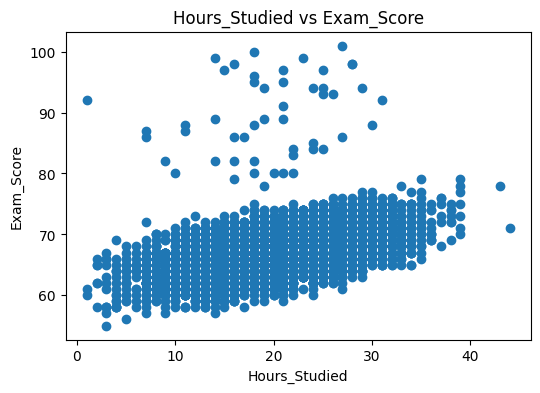

In [249]:
plt.figure(figsize=(6,4))
plt.scatter(x=data.Hours_Studied, y=data.Exam_Score)
plt.title('Hours_Studied vs Exam_Score')
plt.ylabel('Exam_Score')
plt.xlabel('Hours_Studied')
plt.show()

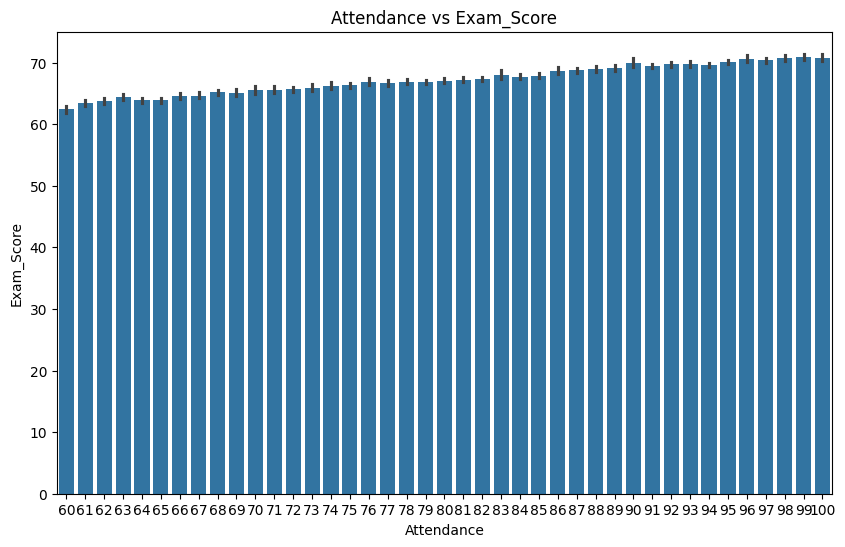

In [250]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.Attendance, y=data.Exam_Score)
plt.title('Attendance vs Exam_Score')
plt.ylabel('Exam_Score')
plt.xlabel('Attendance')
plt.show()

In [251]:
data.Parental_Involvement.head()

0       Low
1       Low
2    Medium
3       Low
4    Medium
Name: Parental_Involvement, dtype: object

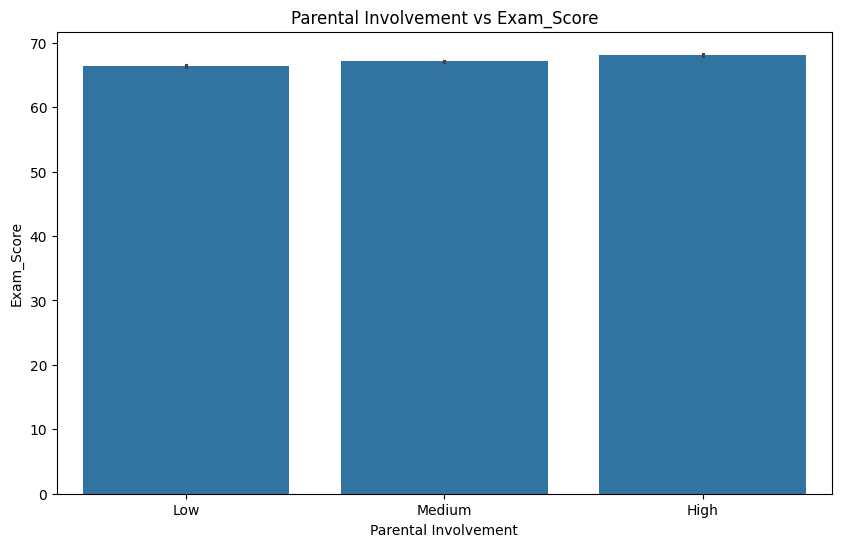

In [252]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.Parental_Involvement, y=data.Exam_Score)
plt.title('Parental Involvement vs Exam_Score')
plt.ylabel('Exam_Score')
plt.xlabel('Parental Involvement')
plt.show()

In [253]:
columns

[Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
        'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
        'Previous_Scores', 'Motivation_Level', 'Internet_Access',
        'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
        'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
        'Parental_Education_Level', 'Distance_from_Home', 'Gender',
        'Exam_Score'],
       dtype='object')]

<Axes: xlabel='School_Type', ylabel='Exam_Score'>

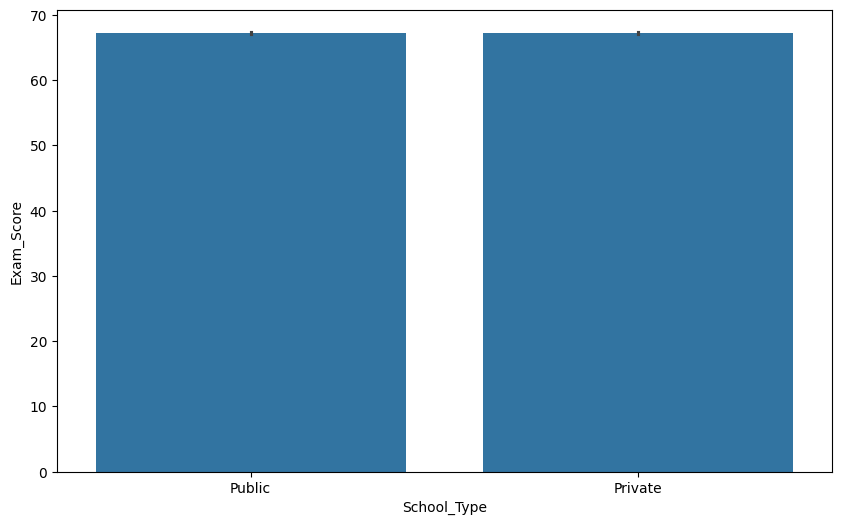

In [254]:
plt.figure(figsize=(10,6))
sns.barplot(x=data.School_Type, y=data.Exam_Score)

In [255]:
(data['School_Type']=='Public').sum()

4598

In [256]:
(data['School_Type']=='Private').sum()

2009

(array([4598.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2009.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

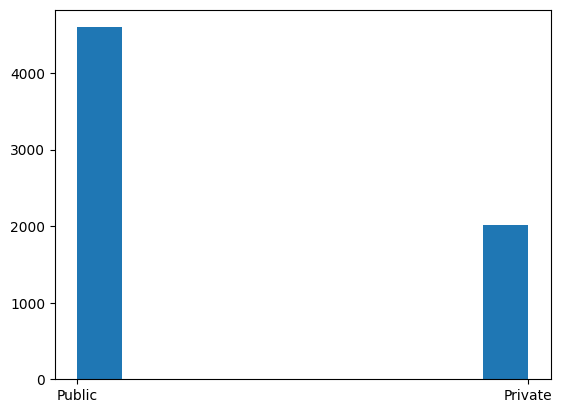

In [257]:
plt.hist(data.School_Type)

(array([3951.,    0.,    0.,    0.,    0., 1998.,    0.,    0.,    0.,
         658.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

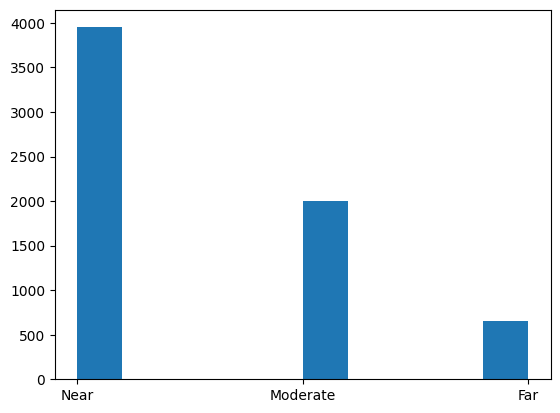

In [258]:
plt.hist(data.Distance_from_Home)

<Axes: xlabel='Distance_from_Home', ylabel='Exam_Score'>

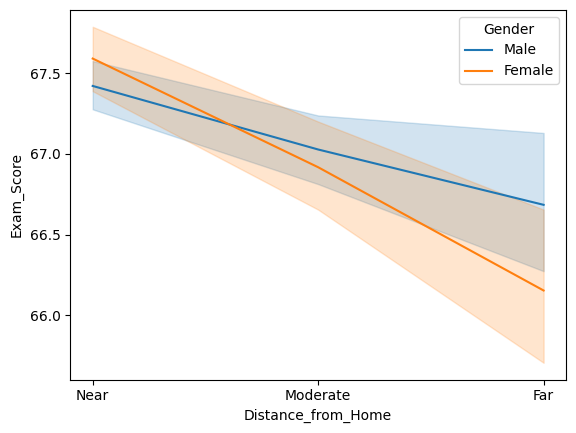

In [259]:
sns.lineplot(x='Distance_from_Home', y='Exam_Score', hue='Gender', data=data)

In [260]:
columns

[Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
        'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
        'Previous_Scores', 'Motivation_Level', 'Internet_Access',
        'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
        'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
        'Parental_Education_Level', 'Distance_from_Home', 'Gender',
        'Exam_Score'],
       dtype='object')]

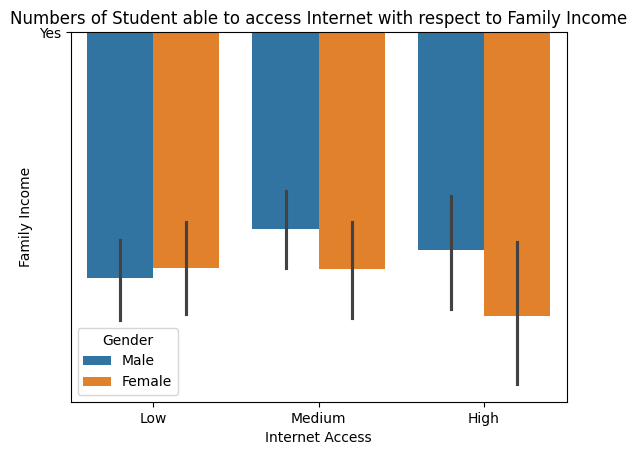

In [301]:
sns.barplot(y=data.Internet_Access, x=data.Family_Income, hue=data.Gender)
plt.title("Numbers of Student able to access Internet with respect to Family Income")
plt.xlabel('Internet Access')
plt.ylabel('Family Income')
plt.show()



<Axes: xlabel='Previous_Scores', ylabel='Exam_Score'>

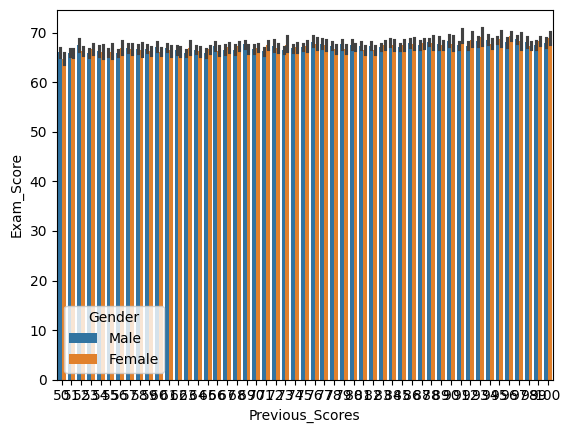

In [307]:
sns.barplot(x=data.Previous_Scores, y=data.Exam_Score, hue=data.Gender)

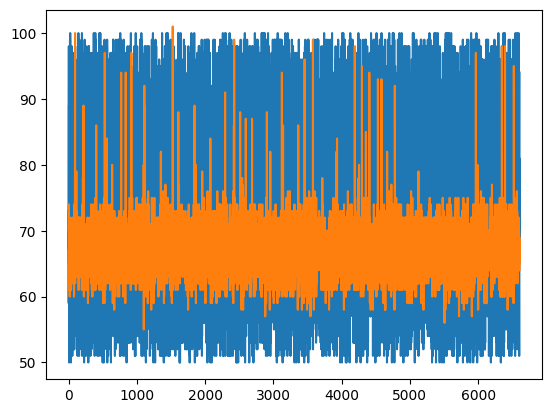

In [317]:
plt.plot(data.Previous_Scores)
plt.plot(data.Exam_Score)
plt.show()

In [320]:
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 10)
y = 5 * X[:, 0] - 3 * X[:, 1] + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the ElasticNet model with lower regularization
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

# Make predictions
y_pred = elastic_net.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Coefficients: {elastic_net.coef_}')


Mean Squared Error: 1.3959368533327832
R^2 Score: 0.5849939566826997
Coefficients: [ 2.81648120e+00 -1.29690646e+00  3.85960035e-01  0.00000000e+00
  0.00000000e+00  6.91045436e-04 -2.82815009e-01  0.00000000e+00
 -0.00000000e+00  2.44032452e-01]
